<a href="https://colab.research.google.com/github/DRVAmarnath2004/prodigy-infotech/blob/main/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the zip file and extraction directory
zip_path = '/content/drive/MyDrive/training_set.zip'
extracted_dir_path = '/content/training_set'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of data for validation
)

# Load training and validation sets
training_set = datagen.flow_from_directory(
    extracted_dir_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_set = datagen.flow_from_directory(
    extracted_dir_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 6404 images belonging to 1 classes.
Found 1601 images belonging to 1 classes.


In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the zip files and extraction directories
train_zip_path = '/content/drive/MyDrive/training_set.zip'
test_zip_path = '/content/drive/MyDrive/test_set.zip'
train_dir_path = '/content/training_set'
test_dir_path = '/content/test_set'

# Unzip the training set
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_dir_path)

# Unzip the test set
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_dir_path)

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of data for validation
)

# Load training and validation sets
training_set = datagen.flow_from_directory(
    train_dir_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_set = datagen.flow_from_directory(
    train_dir_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 6404 images belonging to 1 classes.
Found 1601 images belonging to 1 classes.


In [ ]:
# Create an ImageDataGenerator object for the test set
datagen_test = ImageDataGenerator(rescale=1./255)

# Load the test set
test_set = datagen_test.flow_from_directory(
    test_dir_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 2023 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [ ]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
201/201 [==============================] - 29s 140ms/step - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 2/15
201/201 [==============================] - 28s 138ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3/15
201/201 [==============================] - 27s 137ms/step - loss: 8.6154e-04 - accuracy: 1.0000 - val_loss: 4.2210e-04 - val_accuracy: 1.0000
Epoch 4/15
201/201 [==============================] - 28s 142ms/step - loss: 3.0750e-04 - accuracy: 1.0000 - val_loss: 1.6622e-04 - val_accuracy: 1.0000
Epoch 5/15
201/201 [==============================] - 28s 140ms/step - loss: 1.3026e-04 - accuracy: 1.0000 - val_loss: 2.6443e-04 - val_accuracy: 1.0000
Epoch 6/15
201/201 [==============================] - 28s 140ms/step - loss: 1.2500e-04 - accuracy: 1.0000 - val_loss: 4.3188e-05 - val_accuracy: 1.0000
Epoch 7/15
201/201 [==============================] - 28s 140ms/step - loss: 9.0874e-05 - accuracy

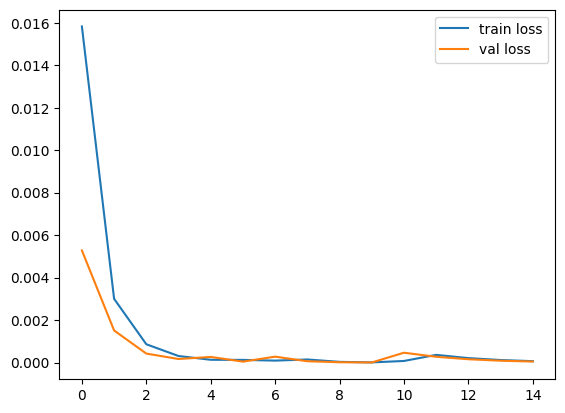

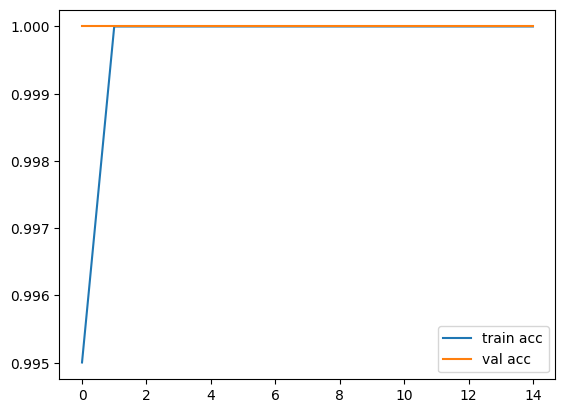

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')

In [41]:
import zipfile

# Path to the zip file and extraction directory
train_zip_path = '/content/drive/MyDrive/training_set.zip'
train_dir_path = '/content/training_set'

# Unzip the training set
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_dir_path)



In [42]:
import os

# List the contents of the extracted training directory
for root, dirs, files in os.walk(train_dir_path):
    print("Root:", root)
    print("Directories:", dirs)
    print("Files:", files[:10])  # Print only the first 10 files in each directory for brevity


Root: /content/training_set
Directories: ['training_set']
Files: []
Root: /content/training_set/training_set
Directories: ['dogs', 'cats']
Files: []
Root: /content/training_set/training_set/dogs
Directories: []
Files: ['dog.3349.jpg', 'dog.3011.jpg', 'dog.1573.jpg', 'dog.1187.jpg', 'dog.3116.jpg', 'dog.1334.jpg', 'dog.173.jpg', 'dog.1954.jpg', 'dog.1081.jpg', 'dog.2159.jpg']
Root: /content/training_set/training_set/cats
Directories: []
Files: ['cat.3088.jpg', 'cat.3197.jpg', 'cat.63.jpg', 'cat.1805.jpg', 'cat.1952.jpg', 'cat.2249.jpg', 'cat.1182.jpg', 'cat.3054.jpg', 'cat.1610.jpg', 'cat.1773.jpg']


In [43]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Assuming the correct path is found in the directory listing
test_image_path = '/content/training_set/training_set/dogs/dog.1023.jpg'  # Update this path based on the actual structure

# Load and preprocess the image
test_image = image.load_img(test_image_path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

# Assuming you have a trained model called `model`
# prediction = model.predict(test_image)
# print(prediction)
result = cnn.predict(test_image)



1/1 [==============================] - 0s 24ms/step


In [44]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
